In [19]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')

# Load Data
train_data = pd.read_csv("files/train.csv")
test_data = pd.read_csv("files/test.csv")

In [20]:
# Display Basic Information
print(train_data.info())
print(test_data.info())

# Check for Missing Values
missing_train = (train_data.isnull().sum() / len(train_data)) * 100
missing_test = (test_data.isnull().sum() / len(test_data)) * 100
print("Missing values in train data:\n", missing_train[missing_train > 0].sort_values(ascending=False))
print("Missing values in test data:\n", missing_test[missing_test > 0].sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
# Drop unnecessary columns
drop_cols = ['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu','LotFrontage']
X_train = train_data.drop(columns=drop_cols + ['SalePrice'])
y_train = train_data['SalePrice']
X_test = test_data.drop(columns=drop_cols)

# Impute missing values
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

In [ ]:
# Feature Engineering
X_train['AgeOfHouse'] = X_train['YrSold'] - X_train['YearBuilt']


In [ ]:
X_test['AgeOfHouse'] = X_test['YrSold'] - X_test['YearBuilt']

X_train['TotalBsmtArea'] = X_train['BsmtFinSF1'] + X_train['BsmtFinSF2'] + X_train['BsmtUnfSF']
X_test['TotalBsmtArea'] = X_test['BsmtFinSF1'] + X_test['BsmtFinSF2'] + X_test['BsmtUnfSF']

X_train['RoomsPerSqft'] = X_train['TotRmsAbvGrd'] / X_train['GrLivArea']
X_test['RoomsPerSqft'] = X_test['TotRmsAbvGrd'] / X_test['GrLivArea']

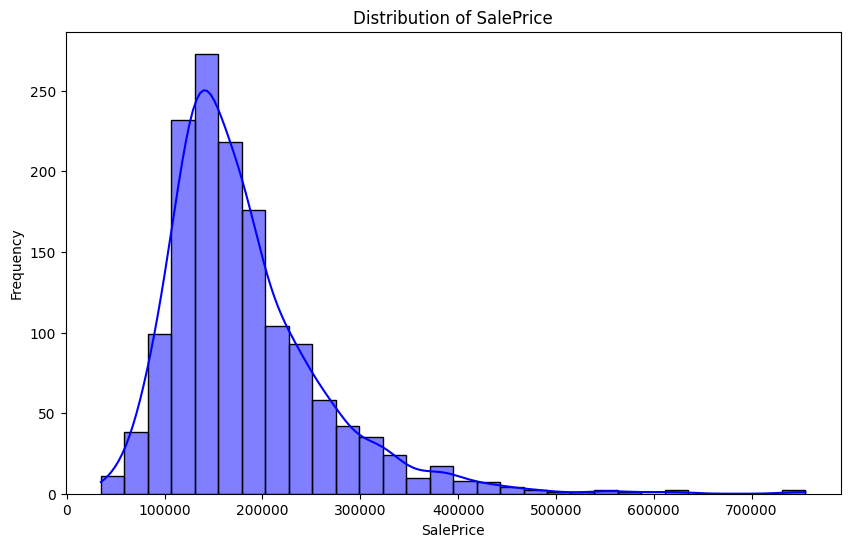

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True, bins=30, color='blue')
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()